# part B

# Task-1 Data Preprocessing

# a) Loading the data

In [42]:
# import pandas as pd
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
df = pd.read_csv("C:\\Users\\harip\\OneDrive\\Desktop\\Data analytics\\machine leaning\\assessment1\\dataset\\BankNote_Authentication.csv")

# Display the first few entries for a snapshot of the data structure
print(df.head())


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


# removing the missing values

In [43]:
df.dropna(inplace=True)


# removing outliers

In [44]:
# Assuming there are no missing values, we are proceeding to outlier removal
# Calculating the Z-score for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)

# Filter out the outliers
df_clean = df[(abs_z_scores < 3).all(axis=1)].copy()

# b) Perform feature scaling or normalization

In [45]:

# Proceed with feature scaling on the numerical columns
scaler = StandardScaler()
# Get the list of numerical features, excluding 'class' which is the target
numerical_features = [col for col in df_clean.columns if col != 'class']
# Apply the scaling to the numerical features
df_clean.loc[:, numerical_features] = scaler.fit_transform(df_clean[numerical_features])


# more cleaning

In [46]:
from sklearn.impute import SimpleImputer

# For numerical columns, you can fill missing values with the mean or median
imputer = SimpleImputer(strategy='mean')  # Or strategy='median'
df_clean[numerical_features] = imputer.fit_transform(df_clean[numerical_features])


In [47]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_clean[numerical_features] = imputer.fit_transform(df_clean[numerical_features])


In [48]:
print(df_clean.head())

   variance  skewness  curtosis   entropy  class
0  1.103540  1.186418 -1.013448  0.328655      0
1  1.434725  1.097028 -0.925150 -0.179100      0
2  1.191111 -0.839847  0.184664  0.605483      0
3  1.044419  1.339977 -1.318300 -1.245668      0
4 -0.076142 -1.165518  0.855089  0.057643      0


In [49]:
if not df_clean.isnull().sum().any():
    print("All missing values handled successfully.")
else:
    print("Missing values still present.")


All missing values handled successfully.


# c) Encode categorical variables appropriately.

In [50]:
# Encoding categorical variables, if present
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
# Identify categorical columns (Note: Adjust this if you have categorical columns)
categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()
# Apply the encoder to the categorical columns
encoded_features = encoder.fit_transform(df_clean[categorical_features])
# Create a DataFrame with encoded variables
encoded_vars_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
# Concatenate the DataFrame with the original one and drop the original categorical columns
df_clean = pd.concat([df_clean.drop(categorical_features, axis=1), encoded_vars_df], axis=1)

# Display the cleaned DataFrame
print(df_clean.head())

   variance  skewness  curtosis   entropy  class
0  1.103540  1.186418 -1.013448  0.328655    0.0
1  1.434725  1.097028 -0.925150 -0.179100    0.0
2  1.191111 -0.839847  0.184664  0.605483    0.0
3  1.044419  1.339977 -1.318300 -1.245668    0.0
4 -0.076142 -1.165518  0.855089  0.057643    0.0


C:\Users\harip\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# d) Split the dataset into training and testing sets. 

In [51]:
from sklearn.model_selection import train_test_split

# Define the features and the target variable
X = df_clean.drop('class', axis=1)  # Independent variables
y = df_clean['class']               # Dependent variable (target)

# Split the data into an 80% training subset and a 20% testing subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the sizes of the training and testing sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Target Shape: {y_test.shape}")



Training Features Shape: (1096, 4)
Training Target Shape: (1096,)
Testing Features Shape: (275, 4)
Testing Target Shape: (275,)


# recleaning to check if data is clean

In [52]:
# Check for NaN values in 'y'
print("NaN values in 'y' before:", y.isnull().sum())

# Option 1: Remove rows where 'y' is NaN
# This is a common approach if the number of such rows is small
y = y.dropna()

NaN values in 'y' before: 35


In [53]:
# Re-check NaN values in 'y'
print("NaN values in 'y' after:", y.isnull().sum())

NaN values in 'y' after: 0


In [54]:
# Assuming 'df' is your original DataFrame and you've already cleaned 'y'
# Ensure 'X' corresponds to the same rows as 'y' by using the index
X = X.loc[y.index]

# Now, 'X' and 'y' should have the same length
print("Length of X:", len(X))
print("Length of y:", len(y))


Length of X: 1336
Length of y: 1336


# d) Split the dataset into training and testing sets. 

In [55]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with GridSearchCV or any other model training


# Task-2 Model Building with hyperparameter tuning

# a) choosing random forest classifier and SVM for model building

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the classifiers
rf_classifier = RandomForestClassifier(random_state=42)


In [57]:
svm_classifier = SVC(random_state=42)


# Implementing hyperparameter tuning by conducting a grid search on the Random Forest model

In [58]:
from sklearn.model_selection import GridSearchCV

# Random Forest parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
rf_optimized = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Implementing hyperparameter tuning by conducting a grid search on the SVM model

In [33]:
# SVM parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best SVM model
svm_optimized = grid_search_svm.best_estimator_
print("Best parameters for SVM:", grid_search_svm.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


# c) Build the classification model using the training data. 

In [34]:
# Random Forest
rf_optimized.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Assuming rf_optimized and svm_optimized are already defined from GridSearchCV
# and X_train, y_train are your training data and labels



# SVM
svm_optimized.fit(X_train, y_train)


SVC(C=1, random_state=42)

# b) Evaluate the performance of the classification model using appropriate metrics

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# For Random Forest
y_pred_rf = rf_optimized.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# For SVM
y_pred_svm = svm_optimized.predict(X_test)
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))


Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       157
         1.0       0.98      0.96      0.97       111

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268

SVM Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       157
         1.0       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



# a) analysing and vizualizing the confusion matrix for the model

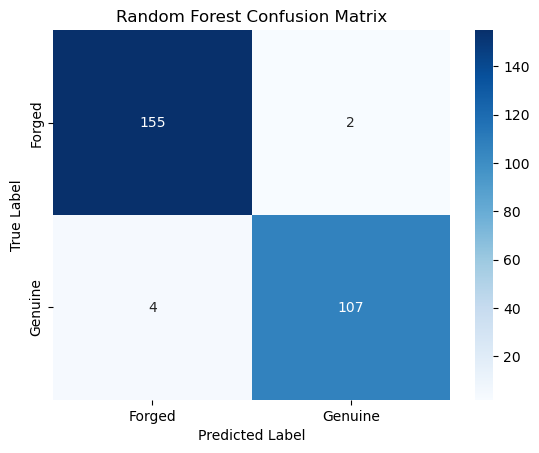

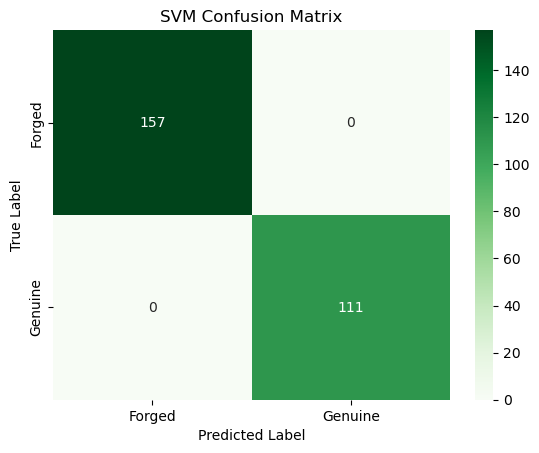

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", xticklabels=["Forged", "Genuine"], yticklabels=["Forged", "Genuine"])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# c) Implement k-fold cross-validation

In [59]:
from sklearn.model_selection import cross_val_score

# For Random Forest
cv_scores_rf = cross_val_score(rf_optimized, X, y, cv=5, scoring='accuracy')
print("Random Forest - CV Scores:", cv_scores_rf)
print("Random Forest - Mean CV Accuracy:", cv_scores_rf.mean())

# For SVM
cv_scores_svm = cross_val_score(svm_optimized, X, y, cv=5, scoring='accuracy')
print("SVM - CV Scores:", cv_scores_svm)
print("SVM - Mean CV Accuracy:", cv_scores_svm.mean())


Random Forest - CV Scores: [0.99253731 0.99625468 0.98876404 0.99625468 0.99625468]
Random Forest - Mean CV Accuracy: 0.9940130806640953
SVM - CV Scores: [1. 1. 1. 1. 1.]
SVM - Mean CV Accuracy: 1.0
